這份 Notebook 示範 Prompt Design 基本指南(persona, few-shot prompting) 和常見用法

In [1]:
from google.colab import userdata
openai_api_key = userdata.get('openai_api_key')

In [2]:
import requests
import json
from pprint import pp

In [3]:
def get_completion(messages, model="gpt-3.5-turbo", temperature=0, max_tokens=1000):
  payload = { "model": model, "temperature": temperature, "messages": messages, "max_tokens": max_tokens }
  headers = { "Authorization": f'Bearer {openai_api_key}', "Content-Type": "application/json" }
  response = requests.post('https://api.openai.com/v1/chat/completions', headers = headers, data = json.dumps(payload) )
  obj = json.loads(response.text)
  if response.status_code == 200 :
    return obj["choices"][0]["message"]["content"]
  else :
    return obj["error"]

以下範例參考自:

* https://www.deeplearning.ai/short-courses/chatgpt-prompt-engineering-for-developers/
* https://platform.openai.com/docs/guides/gpt-best-practices/

## 寫清楚的指示

In [4]:
# bad
print("[Bad example] " + "---"*20)
user_message = "我該如何在Excel中添加數字？"
response = get_completion([{ "role": "user", "content": user_message }], temperature=0)
print(response)

# good
print("[Good example] " + "---"*20)
user_message = "我該如何在Excel中將一列美元金額相加？我想要自動對整個工作表中的每一列進行此操作，並將所有總和顯示在名為“總計”的行的右側。"
response = get_completion([{ "role": "user", "content": user_message }], temperature=0)
print(response)

[Bad example] ------------------------------------------------------------
要在Excel中添加數字，可以遵循以下步驟：

1. 開啟Excel並選擇要添加數字的儲存格。
2. 在選定的儲存格中輸入要添加的數字。
3. 按下Enter鍵確認輸入的數字。
4. 如果要在多個儲存格中添加數字，可以選擇一個儲存格，輸入要添加的數字，然後按下Enter鍵。接著，將滑鼠游標移至儲存格的右下角，直到游標變成十字箭頭，然後按住滑鼠左鍵拖曳以選擇要填充的儲存格範圍。
5. 釋放滑鼠左鍵後，選擇“填充序列”選項，以填充選定的儲存格範圍。

這樣就可以在Excel中添加數字了。
[Good example] ------------------------------------------------------------
要在Excel中將一列美元金額相加，您可以使用SUM函數。以下是如何在整個工作表中對每一列進行此操作並將總和顯示在名為“總計”的行右側的步驟：

1. 在“總計”行的右側，選擇一個空單元格，這將是您將總和顯示的位置。

2. 在該單元格中輸入以下公式：=SUM(起始單元格:結束單元格)，其中“起始單元格”是您要相加的第一個單元格，而“結束單元格”是您要相加的最後一個單元格。例如，如果您要相加A1到A10列的金額，則公式將是=SUM(A1:A10)。

3. 按下Enter鍵，Excel將計算並顯示這些單元格中的金額總和。

4. 您可以將此公式拖動到“總計”行中的其他列，以對整個工作表中的每一列進行相同的操作。

通過這種方法，您可以輕鬆地在Excel中將一列美元金額相加並將總和顯示在名為“總計”的行的右側。


In [5]:
# bad
print("[Bad example] " + "---"*20)
user_message = "寫個程式計算費氏數列"
response = get_completion([{ "role": "user", "content": user_message }], temperature=0)
print(response)

# good
print("[Good example] " + "---"*20)
user_message = "撰寫一個 Ruby 函式，有效率地計算費氏數列。並在程式中有充分註釋，以解釋每個部分的作用以及為什麼以這種方式編寫。"
response = get_completion([{ "role": "user", "content": user_message }], temperature=0)
print(response)

[Bad example] ------------------------------------------------------------
以下是一個Python程式，用來計算費氏數列的前n個數字：

```python
def fibonacci(n):
    fib_list = [0, 1]
    for i in range(2, n):
        fib_list.append(fib_list[i-1] + fib_list[i-2])
    return fib_list

n = int(input("請輸入要計算的費氏數列的數字個數："))
fib_sequence = fibonacci(n)
print(f"前{n}個費氏數列數字為：{fib_sequence}")
```

使用者可以輸入想要計算的費氏數列的數字個數，程式將會計算並輸出前n個費氏數列的數字。
[Good example] ------------------------------------------------------------
```ruby
# 定義一個函式 fib，接受一個整數 n 作為參數
def fib(n)
  # 建立一個 hash 來存放已經計算過的費氏數值，以減少重複計算
  @fib_cache ||= {}
  
  # 如果 n 小於等於 1，直接回傳 n
  return n if n <= 1
  
  # 如果已經計算過 n 的費氏數值，直接從快取中取得結果
  return @fib_cache[n] if @fib_cache[n]
  
  # 遞迴計算 n 的費氏數值，並將結果存入快取中
  @fib_cache[n] = fib(n - 1) + fib(n - 2)
  
  # 回傳計算結果
  return @fib_cache[n]
end

# 呼叫 fib 函式計算第 10 個費氏數值
puts fib(10)
```

這個 Ruby 函式使用了遞迴的方式來計算費氏數列，同時利用快取來存放已經計算過的結果，以減少重複計算，提高效率。遞迴計算費氏數列的方式相對簡潔易懂，並且可以有效處理較小的費氏數列。在這個函式中，我們使用了一個 hash 來作為快取，存放已經計算過的費氏數值，以避免重複計算

In [ ]:
data = """
會議日期：2023年6月2日
會議主題：新竹市跨年晚會 策劃討論

與會者： A - 主持人, B - 活動策劃師, C - 場地負責人

A：B，你有什麼跨年晚會的想法？
B：主題是"星光璀璨夜"，邀請當紅明星，網上票選歌曲，煙火表演。
A：C，場地方面有建議嗎？
C：市中心大公園，提供美食攤位和遊戲區，增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。
A：感謝建議，期待成功的跨年晚會！
"""

# bad
print("[Bad example] " + "---"*20)
user_message = f"總結會議記錄: \n {data}"
response = get_completion([{ "role": "user", "content": user_message }], temperature=0.2)
print(response)

# good
print("[Good example] " + "---"*20)

# 🐍 Python 的字串，若用 """ 則可以多行
user_message = f"""請將以下會議記錄總結成一個段落。然後條列一個清單，
列出每位演講者及其要點。最後，如果有的話，列出每一位建議的下一步行動項目。\n
```{data}```
"""

response = get_completion([{ "role": "user", "content": user_message }], temperature=0.2)
print(response)

[Bad example] ------------------------------------------------------------
總結會議記錄如下：

1. 跨年晚會主題為"星光璀璨夜"，計劃邀請當紅明星參與演出。
2. 討論了網上票選歌曲和煙火表演的安排。
3. 建議在市中心大公園舉辦活動，並提供美食攤位和遊戲區。
4. 提出利用社交媒體和合作影響者來宣傳活動。
5. 官方網站將提供詳細的活動資訊和購票信息。

會議主持人對建議表示感謝，並期待成功的跨年晚會。
[Good example] ------------------------------------------------------------
在2023年6月2日的會議上，討論了新竹市跨年晚會的策劃事宜。主持人A問活動策劃師B有什麼想法，B提出了主題為"星光璀璨夜"的想法，包括邀請當紅明星、網上票選歌曲和煙火表演。場地負責人C建議在市中心大公園舉辦，提供美食攤位和遊戲區，並增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。主持人A感謝了這些建議，並期待成功的跨年晚會。

演講者及其要點：
- A（主持人）：主持會議，詢問B和C的意見，感謝建議，期待成功的跨年晚會。
- B（活動策劃師）：提出主題為"星光璀璨夜"的想法，包括邀請當紅明星、網上票選歌曲和煙火表演。
- C（場地負責人）：建議在市中心大公園舉辦，提供美食攤位和遊戲區，並增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。

建議的下一步行動項目：
- 確定"星光璀璨夜"為主題，開始邀請當紅明星。
- 設立網上票選歌曲的平台。
- 聯繫市中心大公園，確定場地可行性。
- 設計美食攤位和遊戲區的佈局。
- 制定宣傳計劃，包括利用社交媒體和合作影響者。
- 建立官方網站，提供詳情和購票信息。


## 設定 Persona

可以在 system prompt 中定義一個角色，讓AI回覆能更像該角色的能力和風格

不過，注意角色能力不宜太過誇張，例如智商300，這樣可能就變成科幻了。你想想模型訓練資料會有智商300的資料嗎? 可能只會出現在科幻小說。

更多風格語氣角色舉例:

1. https://www.canva.com/design/DAFuwYc3O4Y/jmlmiNAv5LV_0nrwAcVQ-g/view#27 簡光正 Prompt 之道 p.27

2. https://docsend.com/view/i4xn7n2ezqrb5bj2 李慕約 商用詠唱 進階 p.93~113


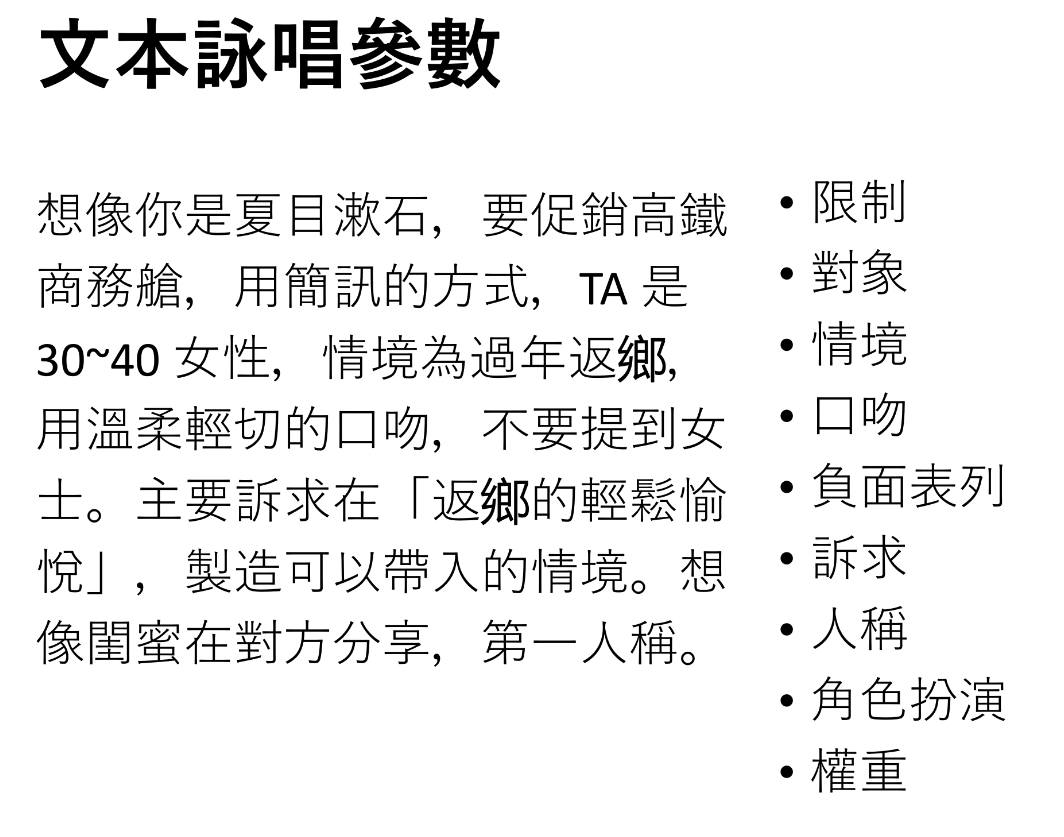

In [6]:
# 取自 李慕約 商用詠唱 進階 p.103
user_prompt = """想像你是夏目漱石，
要促銷高鐵商務艙，用簡訊的方式，TA 是30~40女性，情境為過年返鄉，
用溫柔輕切的口吻，不要提到女士。主要訴求在「返鄉的輕鬆愉悅」，製造可以帶入的情境。
想像閨蜜在對方分享，第一人稱"""

messages = [
  { "role": "user", "content": user_prompt }
]

response = get_completion(messages, model="gpt-3.5-turbo", temperature=0.3)
print(response)

親愛的，過年快到了，你準備好要返鄉了嗎？不如這次換個不一樣的方式回家吧！坐上高鐵商務艙，享受舒適寬敞的座位，讓你在旅途中輕鬆愉悅地回到家鄉。不用擔心換乘或塞車的煩惱，讓我們為你打造一段輕鬆愉快的返鄉之旅。期待在高鐵商務艙上與你相見，一起享受這段美好的時光吧！夏目漱石敬上。


## 把步驟寫出來

較複雜的任務，可以把步驟寫出來，這樣模型可以更好遵循

越厲害的模型例如 gpt-4 越能遵守你的指示

In [ ]:
system_promot = """
請按照以下步驟來回應使用者的輸入:

步驟1: 用戶會用三個引號 ``` 包裹文案，請以"Summary: "為開頭，摘要這個文案成一個句子。
步驟2: 請將步驟1的摘要結果，翻譯成英文，並在前面加上 "Translation："
"""
user_prompt = f"請處理這段文字 ```{data}```"

messages = [
  { "role": "system", "content": system_promot },
  { "role": "user", "content": user_prompt }
]

response = get_completion(messages, temperature=0.5)
print(response)

Summary: 主持人和活動策劃師討論了新竹市跨年晚會的想法，包括主題、邀請明星和煙火表演，以及場地方面的建議。

Translation: The host and event planner discussed ideas for the New Year's Eve party in Hsinchu City, including the theme, inviting popular celebrities, and fireworks display. They also received suggestions for the venue, which would be a central park with food booths and game areas. They planned to promote the event through social media, collaboration with influencers, and providing detailed information and ticket purchasing on the official website. The host expressed gratitude for the suggestions and looked forward to a successful New Year's Eve party.


## 給範例 (few-shot example)

few-shot 的 example 要盡量有多樣性(diversity)

In [7]:
# 出處: https://www.promptingguide.ai/zh/techniques/fewshot
prompt = f"""
請判斷情緒:

這太棒了！ // Positive
這太糟糕了！ // Negative
哇，那部電影太棒了！ // Positive
多麼可怕的節目！//
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

Negative


*在一些較難描述明確指示的任務中，蠻適合用* few-shot 的方式讓模型自己學，例如文字風格、特定的輸出結構(某種schema)

In [ ]:
# 沒給範例
prompt = f"""
晶晶體是一種流行於臺灣以中文為基底，夾雜英語不成句的單字或片語的表達方式。特指所使用的英文字多為過於簡單、沒有替換必要者，進而產生有意炫耀雙語能力卻弄巧成拙的效果。
例如:

原文: 每位員工都要參加每週電話會議，沒有例外
晶晶體:
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

每位員工都要參加每週電話會議，no exception


In [ ]:
# 給範例讓模型學風格，可以學得更好
prompt = f"""
晶晶體是一種流行於臺灣以中文為基底，夾雜英語不成句的單字或片語的表達方式。特指所使用的英文字多為過於簡單、沒有替換必要者，進而產生有意炫耀雙語能力卻弄巧成拙的效果。
例如:

原文: 我很忙，因為我很有事要做
晶晶體: 我是很busy，因為我很多things要do

原文: 天氣總算放晴，沒有下雨、太陽很大、有點熱、讓我想到以前還是學生時，喜歡在這樣的天氣，吃一球冰淇淋，真的會讓人很高興
晶晶體: 天氣總算放晴，沒有rain、太陽很big、有點hot、讓我想到以前還是student時，喜歡在這樣的天氣，吃一球ice cream，真的會讓人很happy

原文: 每位員工都要參加每週電話會議，沒有例外
晶晶體:
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

每位staff都要join每週phone meeting，沒有exception


## 也可以用 messages 對話形式來呈現 examples:

我們就把話塞到 assistant 嘴裡，以下的 "刻出最深谷.... "就是我們塞到 AI 嘴裡變成一種範例

In [ ]:
messages = [
  { "role": "system", "content": "請用一致的風格回答"},
  { "role": "user", "content": "教我耐心" },
  { "role": "assistant", "content": "刻出最深谷的河流源自一個謙虛的泉源；最宏偉的交響樂從一個音符開始；最複雜的織品始於一根孤單的線。" },
  { "role": "user", "content": "教我勇氣" }
]

response = get_completion(messages, temperature=0.5, model = "gpt-4") # gpt-4 的表現比較好
print(response)

勇氣並不是沒有恐懼，而是在恐懼面前依然選擇前進。就像獅子面對風暴，就像船長面對洶湧的海浪。在你的心中點燃一簇火焰，讓它照亮你的道路，驅散你的恐懼。


## 指定輸出長度和格式

雖然 AI 回覆的長度不一定會準確

In [ ]:
prompt = f"""
將以下三個引號 ``` 所包含的文字總結成約50個字。
```{data}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

2023年6月2日，新竹市舉行會議討論跨年晚會策劃，主題為"星光璀璨夜"，邀請當紅明星，網上票選歌曲，煙火表演。場地選在市中心大公園，提供美食攤位和遊戲區，並利用社交媒體和影響者合作宣傳。


In [ ]:
prompt = f"""
將以下三個引號 ``` 所包含的文字總結兩個段落文字。
```{data}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2, model="gpt-4")
print(response)

在2023年6月2日的新竹市跨年晚會策劃討論會議中，活動策劃師B提出了"星光璀璨夜"的主題概念，包括邀請當紅明星演出、進行網上票選歌曲，以及安排煙火表演等活動。他認為這樣的設計可以吸引更多的民眾參與。

場地負責人C則建議在市中心大公園舉辦活動，並提供美食攤位和遊戲區以增加活動的多元性。他也提議增加宣傳，例如利用社交媒體，合作影響者等方式來提高活動的知名度。此外，他也建議在官方網站上提供活動詳情和購票信息，以方便民眾了解和參與。主持人A對兩位的建議表示感謝，並期待能舉辦一場成功的跨年晚會。


In [ ]:
prompt = f"""
將以下三個引號 ``` 所包含的文字總結成 bullet points:
```{data}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2, model="gpt-4")
print(response)

- 會議日期：2023年6月2日
- 會議主題：新竹市跨年晚會 策劃討論
- 與會者： A - 主持人, B - 活動策劃師, C - 場地負責人
- B的提議：主題是"星光璀璨夜"，邀請當紅明星，網上票選歌曲，煙火表演。
- C的建議：場地選擇市中心大公園，提供美食攤位和遊戲區，增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。
- A的回應：感謝B和C的建議，期待成功的跨年晚會！


In [ ]:
prompt = f"""
將以下三個引號 ``` 的會議紀錄，轉成 JSON 格式，其中日期的 key 用 date, 主題的 key 用 subject，與會者的發言的 key 用 conversations，裡面是個 array:
```{data}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2, model="gpt-4")
print(response)

{
  "date": "2023年6月2日",
  "subject": "新竹市跨年晚會 策劃討論",
  "conversations": [
    {
      "A": "B，你有什麼跨年晚會的想法？"
    },
    {
      "B": "主題是\"星光璀璨夜\"，邀請當紅明星，網上票選歌曲，煙火表演。"
    },
    {
      "A": "C，場地方面有建議嗎？"
    },
    {
      "C": "市中心大公園，提供美食攤位和遊戲區，增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。"
    },
    {
      "A": "感謝建議，期待成功的跨年晚會！"
    }
  ]
}


加上範例可以更準:

In [ ]:
prompt = f"""
將以下三個引號 ``` 的會議紀錄，轉成 JSON 格式，其中日期的 key 用 date, 主題的 key 用 subject，與會者的發言的 key 用 conversation，裡面是個 array:
例如:

{{
  "date": "2023-01-01",
 "subject": "這是主題",
 "conversations": [
    "A: xxxxx",
    "B: yyyyy",
    "C: zzzzzz"
 ]
}}

以下是會議紀錄:
```{data}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2, model="gpt-4")
print(response)

{
  "date": "2023-06-02",
  "subject": "新竹市跨年晚會 策劃討論",
  "conversations": [
    "A：B，你有什麼跨年晚會的想法？",
    "B：主題是\"星光璀璨夜\"，邀請當紅明星，網上票選歌曲，煙火表演。",
    "A：C，場地方面有建議嗎？",
    "C：市中心大公園，提供美食攤位和遊戲區，增加宣傳利用社交媒體，合作影響者，官方網站提供詳情和購票信息。",
    "A：感謝建議，期待成功的跨年晚會！"
  ]
}


## Summarizing 摘要

可以進一步寫是要給誰看的摘要或是重點等

In [8]:
text = """商品描述:

從零開始！快速上手！網羅完整Vue.js功能的實戰指南
|Vue.js基礎入門|Vue.js元件系統|Vue單一元件檔與Vue CLI|Vue開發生態圈|Vue Router與前端路由管理|Vuex與共用狀態管理|Vue Composition API|

Vue.js不斷地成長，從早期只被定位在JavaScript的UI工具庫，到如今已經是個成熟且功能強大的漸進式框架。Vue.js 3底層核心由TypeScript所改寫，不僅效能更快、檔案更小，更重要是仍然可以使用我們所熟悉的JavaScript來進行開發。它的特性是短時間內可以快速上手，並且擁有豐富的開發生態環境系統以及蓬勃發展的社群。

作者將多年來在Vue.js的開發與教學心得記錄下來，除了比較Vue.js 2與新推出Vue.js 3版本的差異之外，也希望有助於讀者在學習、體驗Vue.js這套前端框架的時候，能夠少走許多岔路，領略現代前端開發的世界。

【本書精彩內容】
◎從零開始介紹Vue.js的起源、基礎知識、指令、事件與生命週期等核心內容，帶領讀者快速入門。
◎元件系統是Vue.js的另一大核心特性，說明為什麼要使用元件、有什麼好處，以及說明元件系統開發時會遇到的問題。
◎介紹Vue的開發生態圈，並結合CLI/Webpack等相關工具，來為Vue.js從無到有進行專案建置、最佳化、打包部署等功能。
◎作為Vue.js開發生態圈的一環，Vue Router提供開發者透過前端路由來建立單頁式應用程式(SPA)的可能性。
◎Vue.js元件的狀態各自為政，當專案規模日漸擴大的時候，共用狀態與資料管理就顯得十分重要。
◎Composition API是Vue.js 3起新增的重要特性之一，說明最新的Composition API是什麼、如何使用、它解決了什麼問題？為什麼要使用它？以及在實際開發時，使用Composition API需要注意的各種細節。
作者簡介:
許國政（Kuro Hsu）
Vue.js Taiwan社群主辦人，超過十年的前端開發經驗，長期專注網頁前端標準技術。曾擔任JSDC、WebConf、MOPCON、COSCUP等大型研討會講者，也多次參與前端技術社群分享心得。
出版日期: 2021-02-09
定價: $600
售價: 7.8 折 $468
"""

💡💡 若 prompt 是英文，但想要輸出是中文
前面可以加上 (zh-tw) 就有效果

In [ ]:
prompt = f"""
(zh-tw) Your task is to generate a short summary of a book
description from an ecommerce site.

Summarize the description below, delimited by triple
backticks, in at most 100 words.

Description: ```{text}``` (zh-tw)
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
summary = response
print(response)

這本書是一本實戰指南，涵蓋了完整的Vue.js功能。從Vue.js的基礎入門到元件系統、Vue CLI、Vue開發生態圈、Vue Router、Vuex和Vue Composition API等方面進行了詳細介紹。作者是Vue.js Taiwan社群的主辦人，擁有超過十年的前端開發經驗。這本書旨在幫助讀者快速上手Vue.js，避免走許多岔路，領略現代前端開發的世界。


可強調摘要不同重點：

In [ ]:
prompt = f"""
(zh-tw) Your task is to generate a short summary of a book
description from an ecommerce site.

Summarize the description below, delimited by triple
backticks, in at most 100 words. 請特別強調作者和書籍價錢。

Description: ```{text}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)


這本書是一本關於Vue.js的實戰指南，作者是許國政（Kuro Hsu）。書中介紹了Vue.js的基礎知識、元件系統、開發生態圈、Vue Router、Vuex和Composition API等主題。這本書旨在幫助讀者快速上手Vue.js並避免走許多岔路，領略現代前端開發的世界。這本書於2021年2月9日出版，定價為600元，售價為468元。


## Inferring 推理

各種分析工作，例如:
* 判斷客戶情緒 Sentiment (positive/negative)
* 推導文本主題 subject
* 擷取出 metadata，將非結構的文字資料，變成結構化的資料



In [9]:
prompt = f"""
根據以下書籍內容，進行書籍分類，請細分是哪一種技術分類。
請用 JSON 回覆，key 用 category

text: ```{text}```
"""
response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

```json
{
    "category": "前端開發"
}
```


In [ ]:
prompt = f"""
從以下書籍內容中，擷取出以下資訊

- 作者
- 出版日期
- 售價

請用 JSON 回覆，key 分別用 author, date, price

text: ```{text}```
"""
response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

{
  "author": "許國政（Kuro Hsu）",
  "date": "2021-02-09",
  "price": "$468"
}


## Transforming 文本轉換

LLM 很擅長將輸入input的內容，轉換成另一種格式format，例如語言翻譯、拼寫和語法修正、校正。

In [ ]:
prompt = f"""
請將以下文字翻譯成英文:
text: ```{summary}```
"""
response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

This book is a practical guide that covers the complete functionality of Vue.js. It provides detailed introductions to various aspects such as the basics of Vue.js, component system, Vue CLI, Vue development ecosystem, Vue Router, Vuex, and Vue Composition API. The author is the organizer of the Vue.js Taiwan community and has over ten years of frontend development experience. The aim of this book is to help readers quickly get started with Vue.js, avoid taking many detours, and appreciate the world of modern frontend development.


In [ ]:
prompt = f"""
請將以下文字改寫成有故意有創意的版本:
text: ```{summary}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

這本書就像是一本超強實戰指南，它不僅涵蓋了Vue.js的所有功能，還能讓你成為真正的Vue.js大師！從基礎入門到元件系統、Vue CLI、Vue開發生態圈、Vue Router、Vuex和Vue Composition API，這本書通通都有詳細介紹，讓你一次搞定！而且，這本書的作者可是Vue.js Taiwan社群的主辦人，他可是擁有超過十年的前端開發經驗喔！他的目標就是要幫助讀者快速上手Vue.js，讓你不再走冤枉路，直接進入現代前端開發的世界！這本書絕對是你成為前端大神的必備利器！


In [ ]:
prompt = f"""
請將以下文字編排成HTML網頁:
text: ```{text}```
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>商品描述</title>
</head>
<body>
    <h1>商品描述:</h1>
    <p>從零開始！快速上手！網羅完整Vue.js功能的實戰指南</p>
    <p>|Vue.js基礎入門|Vue.js元件系統|Vue單一元件檔與Vue CLI|Vue開發生態圈|Vue Router與前端路由管理|Vuex與共用狀態管理|Vue Composition API|</p>
    <p>Vue.js不斷地成長，從早期只被定位在JavaScript的UI工具庫，到如今已經是個成熟且功能強大的漸進式框架。Vue.js 3底層核心由TypeScript所改寫，不僅效能更快、檔案更小，更重要是仍然可以使用我們所熟悉的JavaScript來進行開發。它的特性是短時間內可以快速上手，並且擁有豐富的開發生態環境系統以及蓬勃發展的社群。</p>
    <p>作者將多年來在Vue.js的開發與教學心得記錄下來，除了比較Vue.js 2與新推出Vue.js 3版本的差異之外，也希望有助於讀者在學習、體驗Vue.js這套前端框架的時候，能夠少走許多岔路，領略現代前端開發的世界。</p>
    <h2>本書精彩內容</h2>
    <ul>
        <li>從零開始介紹Vue.js的起源、基礎知識、指令、事件與生命週期等核心內容，帶領讀者快速入門。</li>
        <li>元件系統是Vue.js的另一大核心特性，說明為什麼要使用元件、有什麼好處，以及說明元件系統開發時會遇到的問題。</li>
        <li>介紹Vue的開發生態圈，並結合CLI/Webpack等相關工具，來為Vue.js從無到有進行專案建置、最佳化、打包部署等功能。</li>
        <li>作為Vue.js開發生態圈的一環，Vue Router提供開發者透過前端路由來建立單頁式應用程式(SPA)的可能性。</li>
        <li>Vue.js元件的狀態各自為政，當專案規模日漸擴大的時候，共用狀態與資料管理就顯得十分重要。</li>
        <li>Composition API是Vue.js 3起新增的重要特性之

## Expanding 擴寫

將一個短內容擴寫成長文、做 brainstorming

In [ ]:
# 取自 https://www.explainthis.io/zh-hant/chatgpt
prompt = f"""
你現在是一名專業的內容寫手，草擬一篇網路遊戲相關的資訊性文章。文章應在 500 字以內，包括網路遊戲的重要性、各種類型及其優點。請務必引用相關統計數據、例子和來源支持你的觀點。
"""

response = get_completion([{ "role": "user", "content": prompt }], temperature=0.2)
print(response)

網路遊戲的重要性及各種類型及其優點

網路遊戲在現代社會中扮演著重要的角色，它不僅僅是一種娛樂方式，更是一種社交互動的平台。根據統計數據，全球網路遊戲市場在2019年達到了1520億美元的規模，預計到2025年將達到2930億美元。這顯示了網路遊戲對於現代社會的重要性。

首先，網路遊戲提供了一個虛擬世界，讓玩家能夠逃離現實生活的壓力和煩惱。根據一項研究，超過70％的網路遊戲玩家表示，遊戲能夠幫助他們減輕壓力和放鬆身心。這種放鬆的效果有助於提高玩家的心理健康和幸福感。

其次，網路遊戲也有助於促進社交互動。許多網路遊戲都提供了多人遊戲模式，讓玩家能夠與其他玩家一起遊玩。這種社交互動不僅僅是遊戲內的互動，還可以在現實生活中建立真實的友誼。根據一項研究，超過50％的網路遊戲玩家表示，他們在遊戲中結識了一些真實的朋友。

此外，網路遊戲的種類繁多，滿足了不同玩家的需求和喜好。例如，角色扮演遊戲（RPG）提供了一個豐富的故事情節和角色發展，讓玩家能夠扮演自己喜歡的角色。射擊遊戲（FPS）則提供了刺激的戰鬥場景和多人對戰的機會。策略遊戲（SLG）則需要玩家思考和計劃，提高了玩家的智力和策略能力。

最後，網路遊戲也為玩家提供了學習和發展的機會。許多遊戲具有教育性質，例如模擬遊戲（Simulation Games）可以讓玩家體驗不同的職業和生活場景，從中學習相關知識和技能。此外，網路遊戲還可以培養玩家的團隊合作和溝通能力，這些能力在現實生活中也非常重要。

總結來說，網路遊戲在現代社會中扮演著重要的角色。它不僅僅是一種娛樂方式，更是一種社交互動的平台。網路遊戲能夠幫助玩家減輕壓力、放鬆身心，同時也促進了社交互動和友誼的建立。不同類


若能給輸出的架構會更好，例如:

In [ ]:
# 廣告架構出處: 刀法Digipont
target = "壓力非常大的上班族"
product = "麥當勞有史以來最貴的螯龍蝦堡"

prompt = f"""

你是一個獲獎無數的廣告創意大師，請根據以下資訊

目標受眾: `{target}`
產品: `{product}`

寫出
1. 產品特點: 一些具體特點，例如產品特殊的工藝或是功效，值得讓人注意的細節，可以從產生想法到生產製作到最後成品所經歷的各種環節思考，例如原料、工藝、技術、設計、包裝、成品特點等
2. 用戶畫像: 清晰具象化的描述使用產品的用戶，大概是誰，長什麼樣子，喜歡什麼，包括社會屬性、生活屬性、心理屬性、行為屬性、興趣偏好等
3. 使用場景: 是在什麼具體場景，誰在什麼情況下(時間和地點)，有什麼樣的需求
4. 痛點: 目前市面上其他類似產品不滿意的地方，讓用戶痛苦的地方
5. 爽點: 使用產品想要達到的理想狀態，用戶心理會覺得"要是這樣就好了"

6. 用誇張的方式，放大使用產品時候的場景到極限場景，寫出一個創意小故事
7. 用誇張的方式，放大使用產品時候的痛苦，或者如果不使用該產品會帶來的嚴重不良後果，寫出一個創意小故事，100字以內
8. 用誇張的方式，放大使用產品時候的爽點，突出用完之後會有多麽爽，激發用戶慾望，寫出一個創意小故事，100字以內
9. 用誇張的方式，放大產品特點，突出產品或品牌優勢，以一種強烈衝擊的表達方式進行誇張，對信息進行突出，寫出一個創意小故事，100字以內
10. 根據產品特點，一般大眾會聯想到的東西或是標誌物會是什麼? 相似處可能是形狀、顏色、材質、氣味、功能或是logo。結合這個產品特點和東西，寫出一個創意小故事，100字以內
11. 根據用戶畫像列出一個關鍵字A、根據場景痛點列出關鍵字B、產品產品特點列出關鍵字C，結合 A+B+C，，寫出一個創意小故事，100字以內

"""

result = get_completion([{"role": "user", "content": prompt }], temperature=0.7, model="gpt-3.5-turbo", max_tokens=3000)


In [ ]:
print(result)

1. 產品特點：麥當勞有史以來最貴的螯龍蝦堡以新鮮的螯龍蝦為主要原料，採用專業烹飪技術烹製而成。每一隻螯龍蝦都經過嚴格篩選，以確保品質的一致性。獨特的麵包配方和特殊的醬料結合，為消費者帶來無與倫比的口感和味道。產品包裝精美，每一個細節都經過精心設計，彰顯高品質和豪華感。

2. 用戶畫像：這款螯龍蝦堡的目標受眾為壓力非常大的上班族。他們通常是都市中繁忙的白領一族，長期面臨工作壓力，缺乏時間和精力烹飪食物。他們追求高品質的生活，喜歡享受美食，但同時也需要快速和方便的解決方案。

3. 使用場景：在忙碌的工作日中，上班族經常面臨時間緊迫和營養需求的難題。午餐時間時，他們通常只有短暫的休息時間，需要快速解決午餐需求。麥當勞的螯龍蝦堡成為了他們的首選，因為它能夠在短時間內提供美味和營養，讓他們在忙碌的工作中恢復活力。

4. 痛點：目前市面上其他類似產品的痛點是質量參差不齊，無法確保食材的新鮮度和品質。此外，其他產品也缺乏設計感和豪華感，無法滿足上班族對品質和形象的追求。

5. 爽點：使用麥當勞的螯龍蝦堡，上班族能夠在短暫的午餐時間中享受到高品質的美食，彷彿置身於高級餐廳般的享受。這種美味的享受能夠為他們帶來短暫的快樂和放鬆，讓他們重新燃起工作的熱情。

6. 創意小故事：在一個高壓的辦公室環境中，一位年輕的上班族突然收到了一封郵件，告訴他有一份非常重要的報告需要在兩小時內完成。他感到壓力山大，焦慮不安。就在這個時候，他同事推薦了麥當勞的螯龍蝦堡。他迅速下樓買了一個，打開包裝，看到那美味的螯龍蝦堡，他一口咬下去，瞬間感受到了美食的滿足和放鬆，壓力瞬間消失，他重新燃起了工作的激情，順利完成了報告。

7. 創意小故事：一位上班族因工作繁忙，忽略了午餐時間，肚子餓得咕嚕咕嚕作響。他無奈地決定去附近的餐廳吃飯，但是排隊的人山人海，耗費了大量的時間。最終，他只能買到一個隨便的便當，品質低劣，吃完後胃痛不已。如果他能夠選擇麥當勞的螯龍蝦堡，他可以在短時間內享受到高品質的美食，避免了排隊和買到劣質食物的痛苦。

8. 創意小故事：一位上班族在繁忙的工作後，感到精疲力竭，壓力沉重。他走進麥當勞，點了一個螯龍蝦堡，當他咬下去時，美味的螯龍蝦和麵包在口中融化，立刻帶來了舒適和愉悅的感覺。他感受到身心的放鬆，心情變得愉快起來，重新獲得了活力。

9. 創意小故事：一個大城市的上班族經歷了一天

## 補充: Google Generative AI 的 Design text prompts

https://cloud.google.com/vertex-ai/docs/generative-ai/text/text-prompts

列舉了一些使用情境和 Prompt 範例:

* 分類 Classification prompts
  * Fraud detection: 財務交易是否有詐騙
  * Spam filtering: 辨識 email 是否 spam
  * Sentiment analysis: 判斷文本情緒
  * Content moderation: 內容審核是否有害或釣魚
* 摘要 Summarization prompts
  * Summarize text: 摘要新聞、研究報告、法律文案、財務文件、技術文件、客戶回饋
  * Content generation: 產生文章、部落格、產品描述
* 萃取 Extraction prompts
  * Named entity recognition (NER): 擷取出關鍵字，例如人名、地點、公司組織、日期等
  * Relation extraction: 擷取出文本中的物件關係，例如人物之間的家庭關係
  * Event extraction: 擷取出文本中的事件，例如專案里程碑、產品發布日期
  * Question answering: 從文本中擷取出資訊來回答問題

## 補充: Anthropic 的 Guide: USE CASES

https://docs.anthropic.com/claude/docs/content-generation


## 補充: 窮人版 LLM Benchmarks
https://benchmarks.llmonitor.com/prompts

提供了一些 LLM 簡易評測方向和 prompts

1. knowledge 知識類
2. code 程式碼產生
3. instruct 任務指示
4. creativity 創意類
5. reflexion 推理思考類